Iteration 0 bestval= 35.58065160885385
Iteration 1 bestval= 35.58065160885385
Iteration 2 bestval= 24.33470951556633
Iteration 3 bestval= 20.97528505461083
Iteration 4 bestval= 20.97528505461083
Iteration 5 bestval= 17.713698097933587
Iteration 6 bestval= 8.954152394359623
Iteration 7 bestval= 8.954152394359623
Iteration 8 bestval= 8.953615816185119
Iteration 9 bestval= 6.602181788783282
Iteration 10 bestval= 4.3721598366593115
Iteration 11 bestval= 3.579239762200446
Iteration 12 bestval= 3.0480834767494422
Iteration 13 bestval= 2.9930177242719602
Iteration 14 bestval= 1.6601419014792491
Iteration 15 bestval= 1.6544446569510773
Iteration 16 bestval= 1.6544446569510773
Iteration 17 bestval= 1.3089428721194571
Iteration 18 bestval= 0.8591377316986031
Iteration 19 bestval= 0.843706564792429
Iteration 20 bestval= 0.8238614199239587
Iteration 21 bestval= 0.359482752633361
Iteration 22 bestval= 0.35777570475600284
Iteration 23 bestval= 0.23827646675886482
Iteration 24 bestval= 0.015756297317

Iteration 203 bestval= 1.4388326025290136e-20
Iteration 204 bestval= 5.241221895134048e-21
Iteration 205 bestval= 5.171706159460559e-21
Iteration 206 bestval= 5.171706159460559e-21
Iteration 207 bestval= 3.7877007891561996e-22
Iteration 208 bestval= 3.7877007891561996e-22
Iteration 209 bestval= 3.7877007891561996e-22
Iteration 210 bestval= 3.7877007891561996e-22
Iteration 211 bestval= 2.514901189555685e-22
Iteration 212 bestval= 2.514901189555685e-22
Iteration 213 bestval= 2.514901189555685e-22
Iteration 214 bestval= 2.514901189555685e-22
Iteration 215 bestval= 2.514901189555685e-22
Iteration 216 bestval= 2.514901189555685e-22
Iteration 217 bestval= 2.514901189555685e-22
Iteration 218 bestval= 2.514901189555685e-22
Iteration 219 bestval= 2.514901189555685e-22
Iteration 220 bestval= 2.292286090155407e-22
Iteration 221 bestval= 2.0342997407134413e-22
Iteration 222 bestval= 2.0096917808617313e-22
Iteration 223 bestval= 1.8201820462370215e-22
Iteration 224 bestval= 6.667961001185249e-23
It

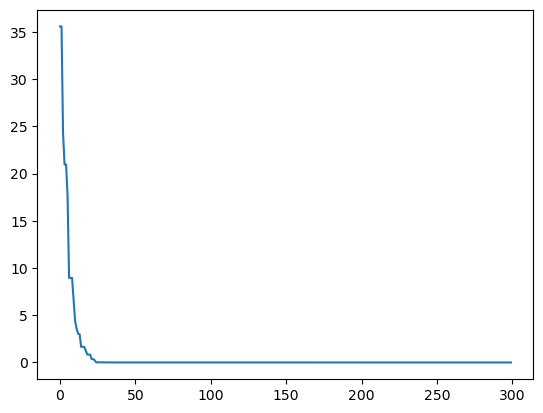

In [2]:

#Artificial Bee Colony Algorithm

import numpy as np
import matplotlib.pyplot as plt

CS=100;    #colony size
D=5;    #dimention of the problem 
L=round(0.2*D*CS); #Limit for  the  scout
foodsource=int(CS/2) #initialize the no. of  position of foodsource of employed bees
C1=np.zeros(foodsource); #trial counter 
maxcycle=300; #no. of iteration
lb=-10;              #lower bound
ub=10;               #upper bound                   

x=np.random.uniform(low=lb, high=ub, size=[foodsource,D])#%initialization of the food source
bestmins=np.zeros(maxcycle)

#objective function of sphere 
def obj_func(x):
    f=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        f[i]=np.sum((x[i,:])**2)
    return f

f=obj_func(x) #alculate objective function value f by calling the function objfunc
globalmin=min(f); # best solution
pos,=np.where(f==globalmin);
bestparam=x[pos[0],:] # position of the best solution

for iteration in range(maxcycle):
    
#Employee bee phase
    for i in range(foodsource):
        K=list(range(foodsource))
        K.remove(i)
        k=np.random.randint(len(K)) #randomly choosen the value of k
        j=np.random.randint(D) #randomly choosen the value of j
        phi=np.random.uniform(low=-1,high=1,size=[1,D]) #randomly choosen the value of phi
        v=x[i,j]+phi[0,j]*(x[i,j]-x[k,j]) # new food source 
        x1=np.array(x[:])
        x1[i,j]=v
        f1=obj_func(x1)
        if (f1[i]<f[i]): # compare objective value
            f[i]=f1[i]
            x[i,j]=v
            C1[i]=0
        else: 
            C1[i]=C1[i]+1
            
            
#onlooker bee phase


    def cal_fitness(f):
        fit_n=np.zeros(shape=[len(f),1])
        for i in range(len(f)):
            if f[i]>=0:
                fit_n[i]=(1/1+f[i])
            else:
                fit_n[i]=(1+abs(f[i]))
        return fit_n

    fitn=cal_fitness(f)

    prob=fitn/np.sum(fitn)
    
    def RouletteWheel(prob):
        p=np.random.rand()
        S=np.cumsum(prob)
        index=np.where(p<=S)
        return index[0][0]
    
    for onlook in range(foodsource):
        i=RouletteWheel(prob)
        K=list(range(foodsource))
        K.remove(i)
        k=np.random.randint(len(K)) #randomly choosen the value of k
        j=np.random.randint(D) #randomly choosen the value of j
        phi=np.random.uniform(low=-1,high=1,size=[1,D]) #randomly choosen the value of phi
        v=x[i,j]+phi[0,j]*(x[i,j]-x[k,j]) # new food source
        x1=np.array(x[:])
        x1[i,j]=v
        f1=obj_func(x1)
        if (f1[i]<f[i]): # compare objective value
            f[i]=f1[i]
            x[i,j]=v
            C1[i]=0
        else: 
            C1[i]=C1[i]+1
            
            
#Scout Bee Phase
    for i in range(foodsource):
        if C1[i]>L:
            R=np.random.uniform(low=lb, high=ub, size=[1,D])
            x[i,:]=R
            f=obj_func(x)
            C1[i]=0
            
        
#Update Best Solution Ever Found  

    minval=min(f);
    if(minval<globalmin):
        
        globalmin=minval
        pos=np.where(f==globalmin)
        bestparam=x[pos[0],:]

    bestmins[iteration]=globalmin;
    
    print("Iteration",iteration,"bestval=",globalmin)


plt.plot(bestmins)
plt.show()